# Статистика и вероятность. №2 Генераторы и Монте-Карло

In [2]:
import pandas as pd
import numpy as np

*генератор броска монетки*

In [7]:
np.random.binomial(1, 0.5) # либо 0, либо 1 с вер. 0.5

0

In [20]:
result = []
for _ in range(3):
  result.append(np.random.binomial(1, 0.5))

In [21]:
result

[0, 0, 1]

In [22]:
[np.random.binomial(1, 0.5) for _ in range(3)]

[1, 0, 1]

In [29]:
np.random.binomial(1, 0.5, size=3) # Принцип Монте-Карло заключается в сериях случайных экспериментов с дальнейшим анализом результата

array([0, 1, 1])

In [33]:
pd.Series([0, 1]).sample(1)

0    0
dtype: int64

In [40]:
result = []
for _ in range(3):
  result.append(pd.Series([0, 1]).sample(1).values[0])

In [41]:
result

[1, 1, 1]

In [42]:
def coin_toss():
  return pd.Series([0, 1]).sample(1).values[0]

In [52]:
coin_toss()

1

In [49]:
def coin_toss2():
  return np.random.binomial(1, 0.5)

In [50]:
coin_toss2()

0

In [51]:
[coin_toss() for _ in range(3)]

[0, 0, 0]

In [60]:
pd.Series([0, 1]).sample(10, replace=True) # так сказать шляпа (выборка с возвращением)

0    0
0    0
1    1
0    0
0    0
1    1
1    1
0    0
0    0
1    1
dtype: int64

In [61]:
pd.Series([0, 1]).sample(10) # Если бы мы не клали обратно нашли "листочки из шляпы"

ValueError: ignored

In [71]:
pd.Series([1, 2, 3, 4, 5, 6]).sample(10, replace=True)

0    1
4    5
0    1
3    4
0    1
2    3
4    5
2    3
5    6
4    5
dtype: int64

In [91]:
pd.Series(np.random.randint(1, 7, size=1000)).value_counts()

6    189
5    174
3    170
2    170
4    159
1    138
dtype: int64

In [84]:
pd.Series([1, 2, 3, 4, 5, 6]).sample(10, replace=True).reset_index(drop=True)

0    3
1    5
2    3
3    1
4    1
5    6
6    5
7    2
8    2
9    1
dtype: int64

In [95]:
np.random.binomial(1, 0)

0

In [96]:
pd.Series([0] * 7 + [1] * 3).sample(10, replace=True)

1    0
1    0
7    1
1    0
0    0
9    1
3    0
5    0
5    0
6    0
dtype: int64

In [97]:
pd.Series(['любит', 'не любит']).sample(1)

0    любит
dtype: object

In [98]:
def chamomile():
  return pd.Series(['любит', 'не любит']).sample(1)

In [99]:
chamomile()

1    не любит
dtype: object

## *Страна непрерывности: равномерное распределение*

<AxesSubplot:>

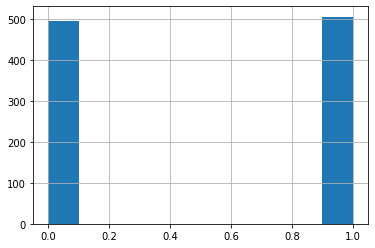

In [100]:
pd.Series(np.random.binomial(1, 0.5, size=1000)).hist()

<AxesSubplot:>

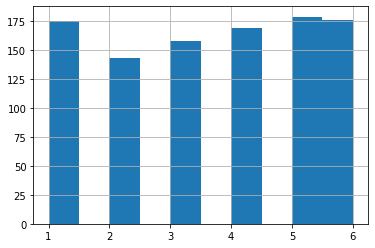

In [101]:
pd.Series(np.random.randint(1, 7, size=1000)).hist()

<AxesSubplot:>

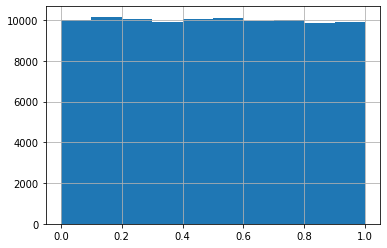

In [107]:
pd.Series(np.random.uniform(size=100000)).hist()

<AxesSubplot:>

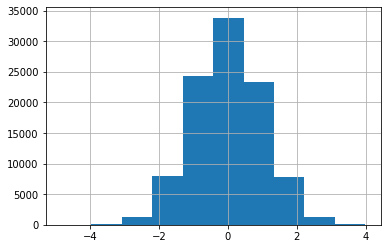

In [108]:
pd.Series(np.random.normal(size=100000)).hist()

<AxesSubplot:>

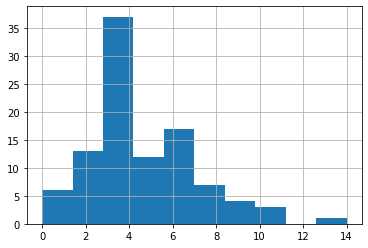

In [130]:
pd.Series(np.random.poisson(5, size=100)).hist()

<AxesSubplot:>

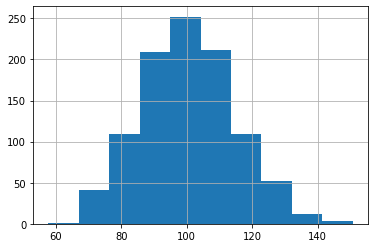

In [132]:
pd.Series(np.random.chisquare(100,size=1000)).hist()

<AxesSubplot:>

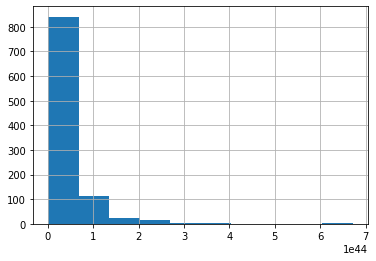

In [133]:
pd.Series(np.random.lognormal(100,size=1000)).hist()

<AxesSubplot:>

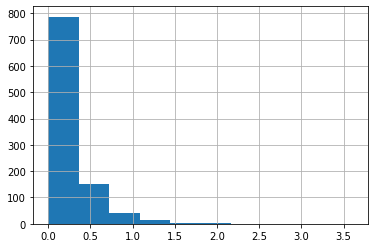

In [137]:
pd.Series(np.random.pareto(5,size=1000)).hist()

# *Свой генератор непрерывной переменной (лунный камень)*

In [144]:
uniform = pd.Series(np.random.uniform(size=10000))

<AxesSubplot:>

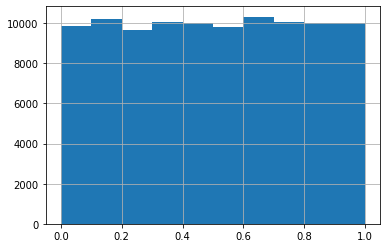

In [145]:
pd.Series(uniform.sample(100000, replace=True)).hist() # черпаем из ведра воду

# *PMF, PDF, CDF*

In [152]:
import seaborn as sns

In [156]:
u = np.random.randint(1, 7, size=100000)

<AxesSubplot:ylabel='Probability'>

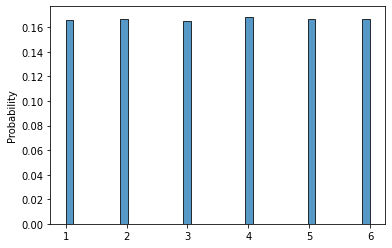

In [157]:
sns.histplot(u, stat='probability') # PMF показывает вероятность, что выпадет то или иное значение

In [151]:
1 / 6

0.16666666666666666

<AxesSubplot:ylabel='Proportion'>

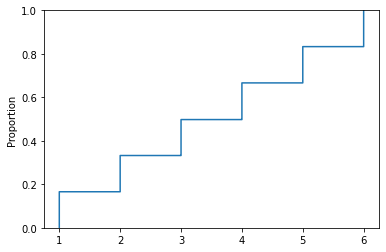

In [165]:
sns.ecdfplot(u) # CDF: получить 1 = 1/6, получить либо 1, либо 2 = 2/6 и тд

<AxesSubplot:ylabel='Probability'>

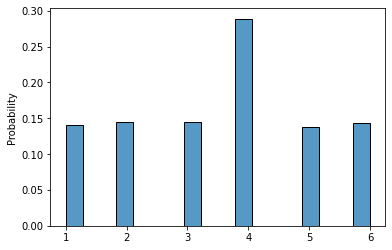

In [161]:
sns.histplot(pd.Series([1, 2, 3, 4, 4, 5, 6]).sample(10000, replace=True), stat='probability')

<AxesSubplot:ylabel='Proportion'>

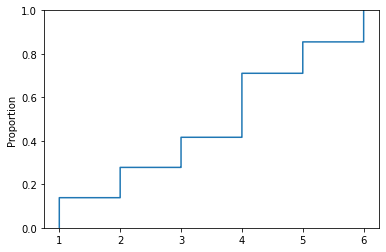

In [162]:
sns.ecdfplot(pd.Series([1, 2, 3, 4, 4, 5, 6]).sample(10000, replace=True))

<AxesSubplot:ylabel='Probability'>

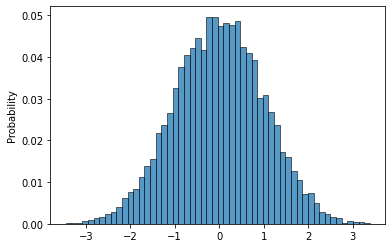

In [163]:
sns.histplot(np.random.normal(size=10000), stat='probability')

<AxesSubplot:ylabel='Density'>

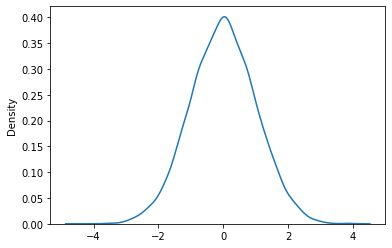

In [169]:
sns.kdeplot(np.random.normal(size=10000))

<AxesSubplot:ylabel='Proportion'>

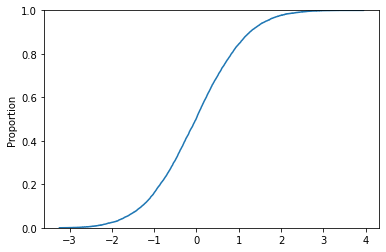

In [167]:
sns.ecdfplot(np.random.normal(size=10000)) # cdf: площадь всей фигуры

# *Проверка на равномерное распределение*

<AxesSubplot:ylabel='Proportion'>

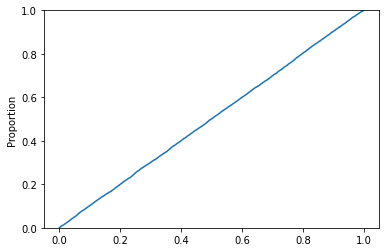

In [171]:
sns.ecdfplot(np.random.uniform(size=10000)) # hist не даст сделать должных выводов о распределении

# *Ку ку график*

In [173]:
measurements = np.random.normal(size=10000)

<AxesSubplot:ylabel='Count'>

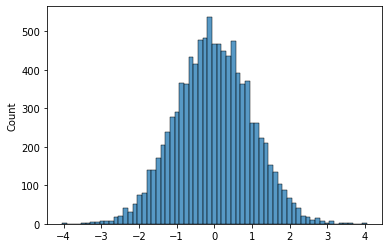

In [174]:
sns.histplot(measurements)

In [176]:
measurements = np.random.uniform(size=10000)

<AxesSubplot:ylabel='Count'>

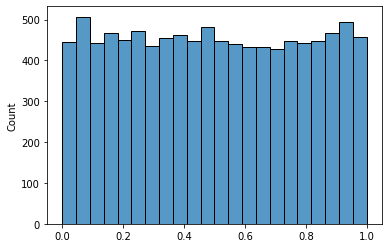

In [177]:
sns.histplot(measurements)

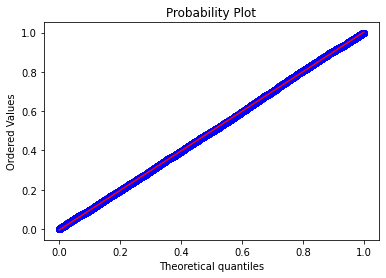

In [179]:
import numpy as np # qq plot показывает насколько наши выборочные значения соответствуют предсказанным значениям, если бы наше распределение было идеально нормальным
import pylab 
import scipy.stats as stats
 
stats.probplot(measurements, dist="uniform", plot=pylab)
pylab.show()

# *Пример Монте-Карло: вероятность двух орлов подряд*

In [183]:
np.random.binomial(1, 0.5, size=2)

array([1, 1])

In [190]:
np.random.binomial(1, 0.5, size=2).sum()

2

In [208]:
n = 1000
result = []
for _ in range(n):
  result.append(np.random.binomial(1, 0.5, size=2).sum())

In [209]:
result[:10]

[2, 1, 2, 1, 1, 1, 1, 2, 0, 1]

In [210]:
pd.Series(result).value_counts(normalize=True)

1    0.519
0    0.251
2    0.230
dtype: float64

In [211]:
0.5 * 0.5

0.25

In [214]:
pd.Series(np.random.binomial(2, 0.5, size=10000)).value_counts(normalize=True) # то же самое, что и выше

1    0.4970
0    0.2528
2    0.2502
dtype: float64

<AxesSubplot:ylabel='Count'>

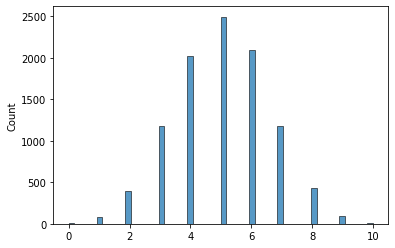

In [220]:
sns.histplot(np.random.binomial(10, 0.5, size=10000)) # видно, что аппроксимация как у нормального распределения 